In [1]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()

X = iris.data[:, [2, 3]]  # we only take the first two features.
Y = iris.target

print('Labels:', np.unique(Y))

Labels: [0 1 2]


In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, shuffle=True, random_state=42, stratify=Y)

print('Labels counts in y:', np.bincount(Y))
print('Labels counts in y_train:', np.bincount(Y_train))
print('Labels counts in y_test:', np.bincount(Y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


In [5]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_decision_regions


dt_model = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=1)

dt_model.fit(X_train, Y_train)

print(dt_model)

DecisionTreeClassifier(max_depth=2, random_state=1)


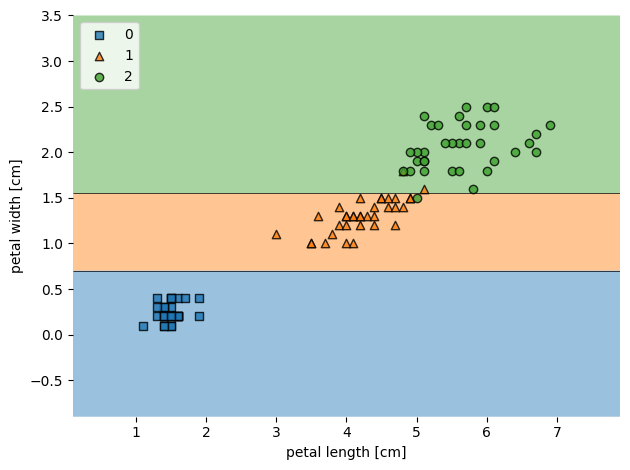

In [6]:
plot_decision_regions(X_train, Y_train, dt_model)

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [7]:
Y_test_pred = dt_model.predict(X_test)

from sklearn.metrics import accuracy_score

print('Accuracy: ', accuracy_score(Y_test, Y_test_pred)*100, '%')

Accuracy:  88.88888888888889 %


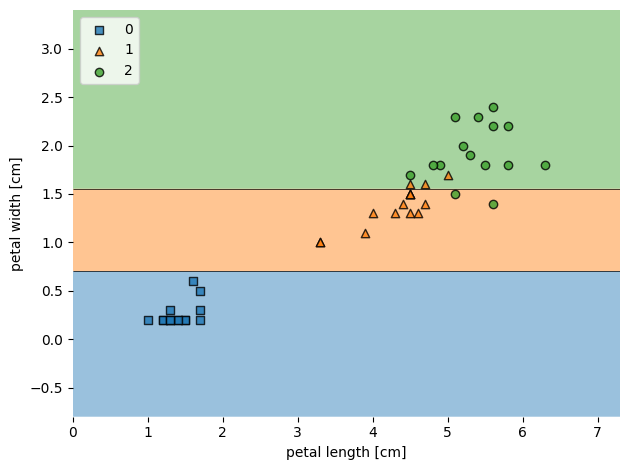

In [8]:
plot_decision_regions(X_test, Y_test, dt_model)

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

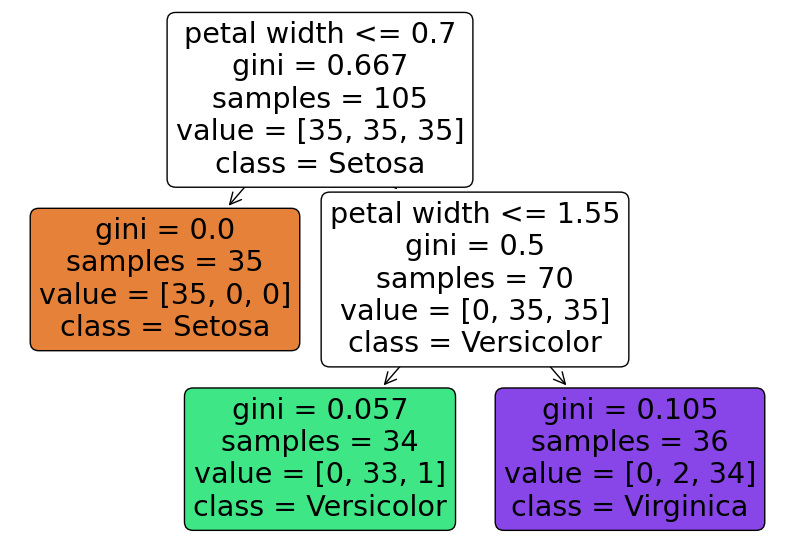

In [9]:
from sklearn.tree import plot_tree

plt.figure(figsize=(10, 7))

plot_tree(dt_model, filled=True, rounded=True,
          class_names=['Setosa',
                       'Versicolor',
                       'Virginica'],
          feature_names=['petal length',
                         'petal width'])

plt.show()